In [2]:
import os
os.chdir('../..')
!ls

future_trade


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pyomo.environ import *
# from pyomo.mpec import *
import math
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# from future_trade.spatial_trade_model.functions_general import *
# from future_trade.spatial_trade_model.functions_calibration import *
# from pathos.multiprocessing import ProcessPool, cpu_count

In [4]:
data_dir = '../../OPSIS/Data/Trade_clearance_model'
calibration_output = f'{data_dir}/Output/Calibration/'

In [5]:
for crop_code in [
    'jwhea', 'jrice', 'jmaiz', 'jsoyb', 'jbarl', 'jcass', 'jvege', 
    'jbana', 'jbean', 'jgrnd', 'jrpsd', 'jpalm', 'jsugc',
    'jmill', 'jsorg', 'jocer', 
    'jpota', 'jyams', 'jswpt', 'jorat', 
    'jplnt', 'jsubf', 'jtemf', 
    'jchkp', 'jcowp', 'jlent', 'jpigp', 'jopul', 
    'jothr', 
    'jsnfl', 'jtols',
    'jsugb'
    ]:
    print(crop_code)
    df_country = pd.read_csv(f'{data_dir}/Input/Country_data/country_information_'+str(crop_code)+'.csv')
    df_bil = pd.read_csv(f'{data_dir}/Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')
    
    trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
    trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
    trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

    calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
    calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

    tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
    tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

    conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
    conprice.columns = ['abbreviation', 'conprice']

    prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
    prodprice.columns = ['abbreviation', 'prodprice']
    
    print(f'rows in calibrated trade: {trade_cal.shape}')

    df_bil = df_bil.merge(trade_cal)
    print(f"accuracy: {len(df_bil[(df_bil['trade_cal']>1)==(df_bil['q_calib']>1)])/(len(df_bil))}")
    print(f"precision: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['trade_cal']>1)])}")
    print(f"recall: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['q_calib']>1)])}")
    print(f"r2 linear: {r2_score(df_bil['q_calib'], df_bil['trade_cal'])}")
    print(f"r2 log: {r2_score(np.log(df_bil['q_calib']+1), np.log(df_bil['trade_cal']+1))}")
    print(f"r2 linear excl dom sup: {r2_score(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'])}")
    print(f"r2 log excl dom sup: {r2_score(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']+1))}")
    print(f"rmse: {np.sqrt(mean_squared_error(df_bil['q_calib'], df_bil['trade_cal']))}")

jwhea
rows in calibrated trade: (23409, 3)
accuracy: 0.90319962407621
precision: 0.8671273445212241
recall: 0.7338345864661654
r2 linear: 0.9999990564774628
r2 log: 0.7265731784570998
r2 linear excl dom sup: 0.9998860477784629
r2 log excl dom sup: 0.7140511467497511
rmse: 1184.5175669216483
jrice
rows in calibrated trade: (23409, 3)
accuracy: 0.897518048613781
precision: 0.9290917921321029
recall: 0.45919347095535284
r2 linear: 0.999999358697712
r2 log: 0.668760410561031
r2 linear excl dom sup: 0.9990427701582278
r2 log excl dom sup: 0.6355702433455448
rmse: 1041.4764159822096
jmaiz
rows in calibrated trade: (23409, 3)
accuracy: 0.8902131658763723
precision: 0.8556990454800674
recall: 0.5971786833855799
r2 linear: 0.9999998526827631
r2 log: 0.6944157185866421
r2 linear excl dom sup: 0.9999881557498888
r2 log excl dom sup: 0.6549089141952693
rmse: 1034.2555816635738
jsoyb
rows in calibrated trade: (23409, 3)
accuracy: 0.8904267589388697
precision: 0.7220949263502455
recall: 0.5624681285

In [6]:
crop_code = 'jsubf'

In [7]:
df_country = pd.read_csv(f'{data_dir}/Input/Country_data/country_information_'+str(crop_code)+'.csv')
df_bil = pd.read_csv(f'{data_dir}/Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')

trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
conprice.columns = ['abbreviation', 'conprice']

prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
prodprice.columns = ['abbreviation', 'prodprice']

In [8]:
calib.describe()

,calib
count,23409.000000
mean,1.043578
std,7.465567
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,186.633165


In [9]:
tc.describe()

,tc
count,23409.000000
mean,184.197915
std,77.925922
min,2.003399
25%,130.687660
50%,164.252823
75%,217.565256
max,786.961689


In [10]:
conprice.describe()

,conprice
count,153.000000
mean,742.330683
std,99.105621
min,493.967875
25%,687.108940
50%,738.679885
75%,803.153913
max,1069.800959


In [11]:
prodprice.describe()

,prodprice
count,153.000000
mean,888.554557
std,1057.796582
min,364.061546
25%,598.881150
50%,652.706753
75%,813.696694
max,12249.333218


In [12]:
calib.sort_values('calib').tail(100)

,from_abbreviation,to_abbreviation,calib
9856,IRQ,IRQ,56.738828
5040,CRI,USA,56.822092
16515,PER,USA,57.101508
14074,MWI,ZMB,57.442718
8485,GTM,JPN,57.907366
...,...,...,...
21252,TUR,TUR,161.570978
14476,NER,NER,166.365758
9394,IND,IND,170.277341
4964,CRI,JAM,177.808304


In [13]:
df_bil[['trade_USD_t']].describe()

,trade_USD_t
count,23409.000000
mean,183.784187
std,77.806212
min,14.341609
25%,130.313796
50%,163.423115
75%,217.032799
max,786.991860


In [14]:
df_country['prod_price_USD_t'].describe()

count      153.000000
mean       892.082475
std       1116.252595
min        154.907248
25%        449.486697
50%        622.226837
75%       1075.525648
max      12257.085998
Name: prod_price_USD_t, dtype: float64

In [15]:
d = df_bil[['from_abbreviation', 'to_abbreviation', 'trade_USD_t']].merge(tc)
r2_score(d['trade_USD_t'], d['tc'])

0.9843401961828674

In [16]:
np.sqrt(mean_squared_error(d['trade_USD_t'], d['tc']))

9.736394349769462

In [17]:
d = df_country[['abbreviation', 'prod_price_USD_t']].merge(prodprice)
r2_score(d['prod_price_USD_t'], d['prodprice'])

0.9308169375927172

In [18]:
np.sqrt(mean_squared_error(d['prod_price_USD_t'], d['prodprice']))

292.6432094703831

In [19]:
df_bil = df_bil.merge(trade_cal)

In [20]:
df_bil[['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,2.340900e+04,2.340900e+04
mean,2.207289e+04,2.196919e+04
std,1.073584e+06,1.073585e+06
min,0.000000e+00,1.000000e+00
25%,4.447661e-03,1.000000e+00
50%,5.021083e-01,1.000000e+00
75%,2.192169e+01,1.000000e+00
max,1.354488e+08,1.354488e+08


In [21]:
df_bil[['q_calib', 'trade_cal']].sum()

q_calib      5.167043e+08
trade_cal    5.142768e+08
dtype: float64

In [22]:
df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']][['q_calib', 'trade_cal']].sum()

q_calib      4.619427e+07
trade_cal    4.395208e+07
dtype: float64

In [23]:
df_bil[df_bil['q_calib']>1].shape

(10637, 10)

In [24]:
df_bil[df_bil['trade_cal']>1].shape

(3670, 10)

In [25]:
# false positives
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,2.320000e+02,232.000000
mean,2.398197e-01,1061.538793
std,2.880620e-01,1735.224211
min,3.241517e-10,2.000000
25%,4.886841e-03,10.000000
50%,8.979793e-02,111.500000
75%,4.136460e-01,1421.250000
max,9.923664e-01,10504.000000


In [26]:
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)].sort_values('trade_cal').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,trade_USD_t,adv,q_calib,trade_relationship,q_old,trade_relationship_old,trade_cal
11315,KGZ,VEN,jsubf,289.585999,0.130435,1.675676e-01,0,2.236187e-01,0,6335.0
4262,CMR,TCD,jsubf,234.442408,0.000000,5.955911e-01,0,4.663982e-01,0,6367.0
20686,TKM,CRB,jsubf,173.722949,0.000007,2.054800e-07,0,8.108679e-08,0,6508.0
5195,CUB,VEN,jsubf,140.246516,0.000000,6.412589e-02,0,1.447675e-01,0,7673.0
5117,CUB,JAM,jsubf,91.332531,0.000000,8.636043e-01,0,2.522477e-01,0,10504.0


In [27]:
# false negatives
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,7199.000000,7199.0
mean,362.638115,1.0
std,1796.802760,0.0
min,1.000276,1.0
25%,3.492984,1.0
50%,13.801954,1.0
75%,83.378183,1.0
max,59691.783800,1.0


In [28]:
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)].sort_values('q_calib').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,trade_USD_t,adv,q_calib,trade_relationship,q_old,trade_relationship_old,trade_cal
12012,LBR,LBR,jsubf,57.886274,0.000000,29040.488903,1,28186.390722,1,1.0
16136,PAK,KAZ,jsubf,271.923660,0.027065,31483.480031,1,989.836839,1,1.0
6776,FJI,FJI,jsubf,66.090126,0.000000,31955.331537,1,21162.397071,1,1.0
15375,NZL,KOR,jsubf,96.831840,0.568507,36654.797365,1,19063.794175,1,1.0
17503,RAP,IND,jsubf,81.863914,0.347826,59691.783800,1,40427.678071,1,1.0


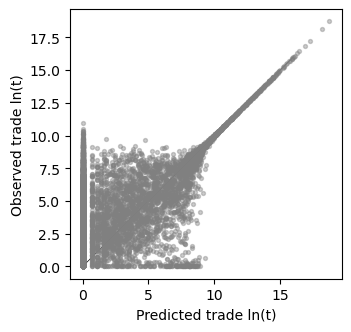

In [29]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil['trade_cal']), np.log(df_bil['q_calib']+1), s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

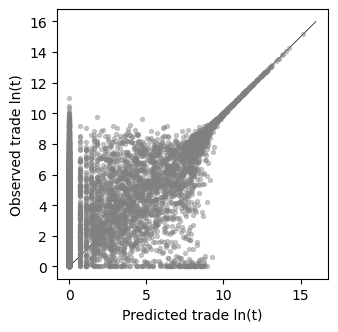

In [30]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']), 
            np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

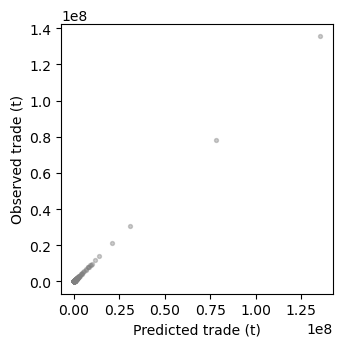

In [31]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil['trade_cal'], df_bil['q_calib'], s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()

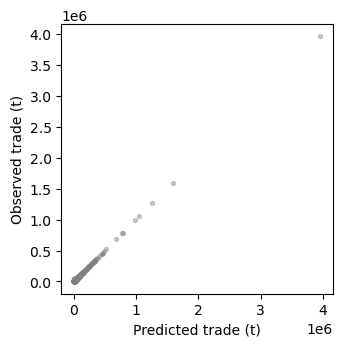

In [32]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'], 
            df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()

In [33]:
# demand
demand = df_bil.groupby(['to_abbreviation'])[['q_calib', 'trade_cal']].sum().reset_index()
r2_score(demand['q_calib'], demand['trade_cal'])

0.9999928679439237

In [34]:
r2_score(np.log(demand['q_calib']+1), np.log(demand['trade_cal']+1))

0.9283071443863627

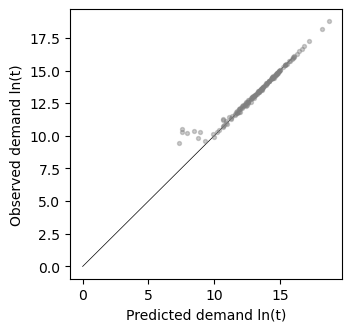

In [35]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(demand['trade_cal']), np.log(demand['q_calib']+1), s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted demand ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed demand ln(t)')
plt.show()

In [36]:
demand['diff'] = np.abs(demand['q_calib'] - demand['trade_cal'])
demand['perc_diff'] = np.abs(demand['q_calib'] - demand['trade_cal']) / demand['q_calib']
demand.sort_values('diff').tail(20)

,to_abbreviation,q_calib,trade_cal,diff,perc_diff
22,CAN,1.470888e+06,1421565.0,49323.466169,0.033533
97,NLD,1.212403e+06,1162432.0,49970.598773,0.041216
147,VNM,8.679199e+06,8628679.0,50519.522387,0.005821
66,ISR,6.635574e+05,612032.0,51525.391387,0.077650
120,SEN,1.710827e+06,1659065.0,51762.453274,0.030256
100,NZL,4.048786e+05,457190.0,52311.369947,0.129203
24,CHM,1.395602e+08,139507204.0,53041.005804,0.000380
68,JAM,2.985195e+05,352466.0,53946.451257,0.180713
64,IRQ,2.556969e+06,2500857.0,56111.957980,0.021945
15,BLX,8.090935e+05,752309.0,56784.468991,0.070183


In [37]:
# supply
supply = df_bil.groupby(['from_abbreviation'])[['q_calib', 'trade_cal']].sum().reset_index()
r2_score(supply['q_calib'], supply['trade_cal'])

0.9999900005194688

In [38]:
r2_score(np.log(supply['q_calib']+1), np.log(supply['trade_cal']+1))

0.7896742801397005

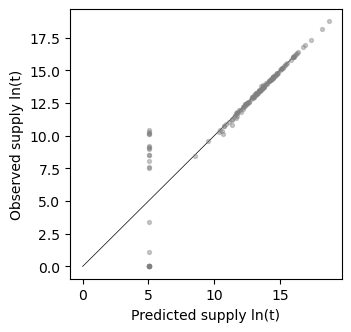

In [39]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(supply['trade_cal']), np.log(supply['q_calib']+1), s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted supply ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed supply ln(t)')
plt.show()

In [40]:
supply['diff'] = np.abs(supply['q_calib'] - supply['trade_cal'])
supply['perc_diff'] = np.abs(supply['q_calib'] - supply['trade_cal']) / supply['q_calib']
supply.sort_values('diff').tail(20)

,from_abbreviation,q_calib,trade_cal,diff,perc_diff
66,ISR,9.861506e+05,924219.0,61931.588940,0.062801
26,CIV,4.404593e+05,374708.0,65751.341264,0.149279
61,IND,7.879347e+07,78726612.0,66855.761177,0.000848
150,ZAF,3.631865e+06,3563877.0,67987.753077,0.018720
105,PAK,7.453586e+06,7384771.0,68814.712157,0.009232
108,PHL,1.317771e+07,13108536.0,69173.197146,0.005249
40,DZA,5.296770e+06,5226745.0,70025.107463,0.013220
30,COL,5.778930e+06,5705120.0,73810.088461,0.012772
67,ITP,5.012897e+06,4932136.0,80760.717130,0.016111
32,CRI,3.786720e+06,3701782.0,84937.559951,0.022430
